In [1]:
import pandas as pd
import numpy as np

import functions

import warnings
warnings.filterwarnings("ignore")


The following dataset contains information from an *airline passenger satisfaction survey*. 

Link to data: https://www.kaggle.com/datasets/johndddddd/customer-satisfaction

#### I have setted two goals:
    1. To identify correlated factors that affect on satisfaction.
    2. To predict customer satisfaction based on all the avaiable information.


In [2]:
data = pd.read_csv('data/Invistico_Airline.csv')
pd.set_option('display.max_columns', None)
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [3]:
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [4]:
# data.info()

In [5]:
data['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [6]:
satisfied = data['satisfaction'].value_counts()['satisfied']
print('Amount of SATISFIED CUSTOMER IS:', satisfied)

no_satisfied = data['satisfaction'].value_counts()['satisfied']
print('Amount of NO SATISFIED CUSTOMER IS:', no_satisfied)

satisfaction_percentage = round(satisfied/(no_satisfied + satisfied)*100,2)
print('Satisfaction percentage is:', satisfaction_percentage)

Amount of SATISFIED CUSTOMER IS: 71087
Amount of NO SATISFIED CUSTOMER IS: 71087
Satisfaction percentage is: 50.0


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

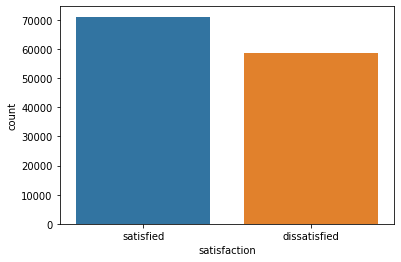

In [7]:
import seaborn as sns
display(sns.countplot(x=data['satisfaction']))

In [8]:
data['satisfaction'] = data.satisfaction.replace(to_replace=['dissatisfied', 'satisfied'], value=[0, 1])
data['satisfaction'].unique()

array([1, 0])

In [9]:
# Numerical columns
print('Numerical features:')
numerical = data.select_dtypes(['number'])
display(numerical.head())

print('Categorical features:')
# Categorical columns
categorical = data.select_dtypes(['object'])
display(categorical.head())

Numerical features:


,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


Categorical features:


,Gender,Customer Type,Type of Travel,Class
0,Female,Loyal Customer,Personal Travel,Eco
1,Male,Loyal Customer,Personal Travel,Business
2,Female,Loyal Customer,Personal Travel,Eco
3,Female,Loyal Customer,Personal Travel,Eco
4,Female,Loyal Customer,Personal Travel,Eco


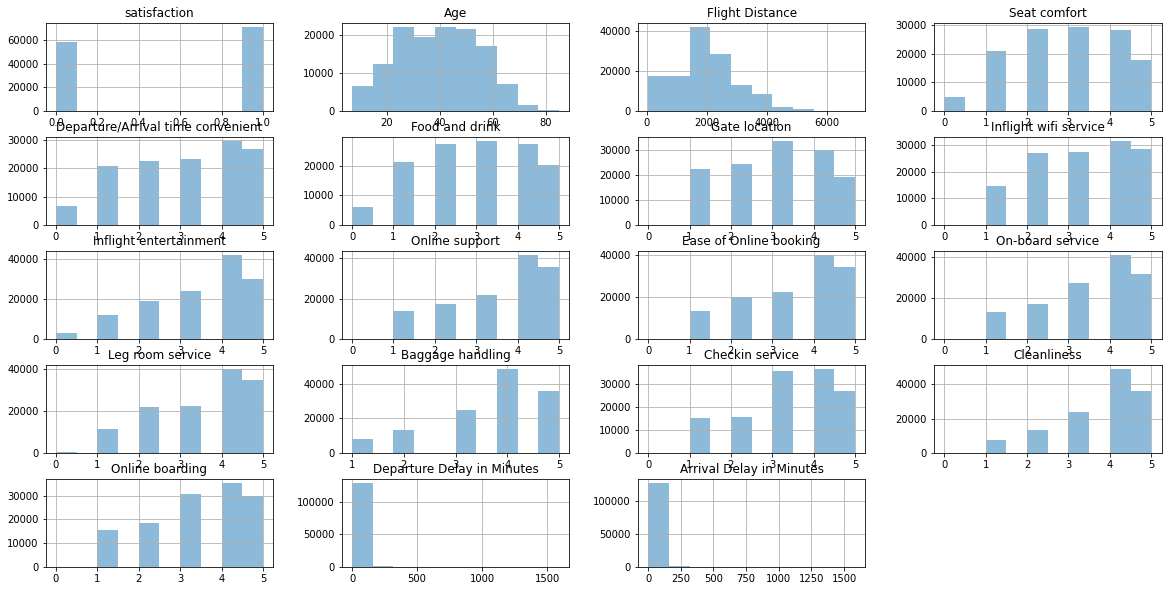

In [10]:
from matplotlib import pyplot
numerical.hist(alpha=0.5, figsize=(20, 10))
pyplot.show()

In [11]:
numerical = numerical.dropna()
functions.nulls_percent(numerical)

,column_name,nulls_percentage
0,satisfaction,0.0
1,Age,0.0
2,Flight Distance,0.0
3,Seat comfort,0.0
4,Departure/Arrival time convenient,0.0
5,Food and drink,0.0
6,Gate location,0.0
7,Inflight wifi service,0.0
8,Inflight entertainment,0.0
9,Online support,0.0


In [12]:
# Need to change SATISFACTION col. Make it 0 and 1. 0 nosatisfacted 1 satisfacted
# So I can treat as a numerical and do X y Split with numericals
# Then try to run the Pipeline

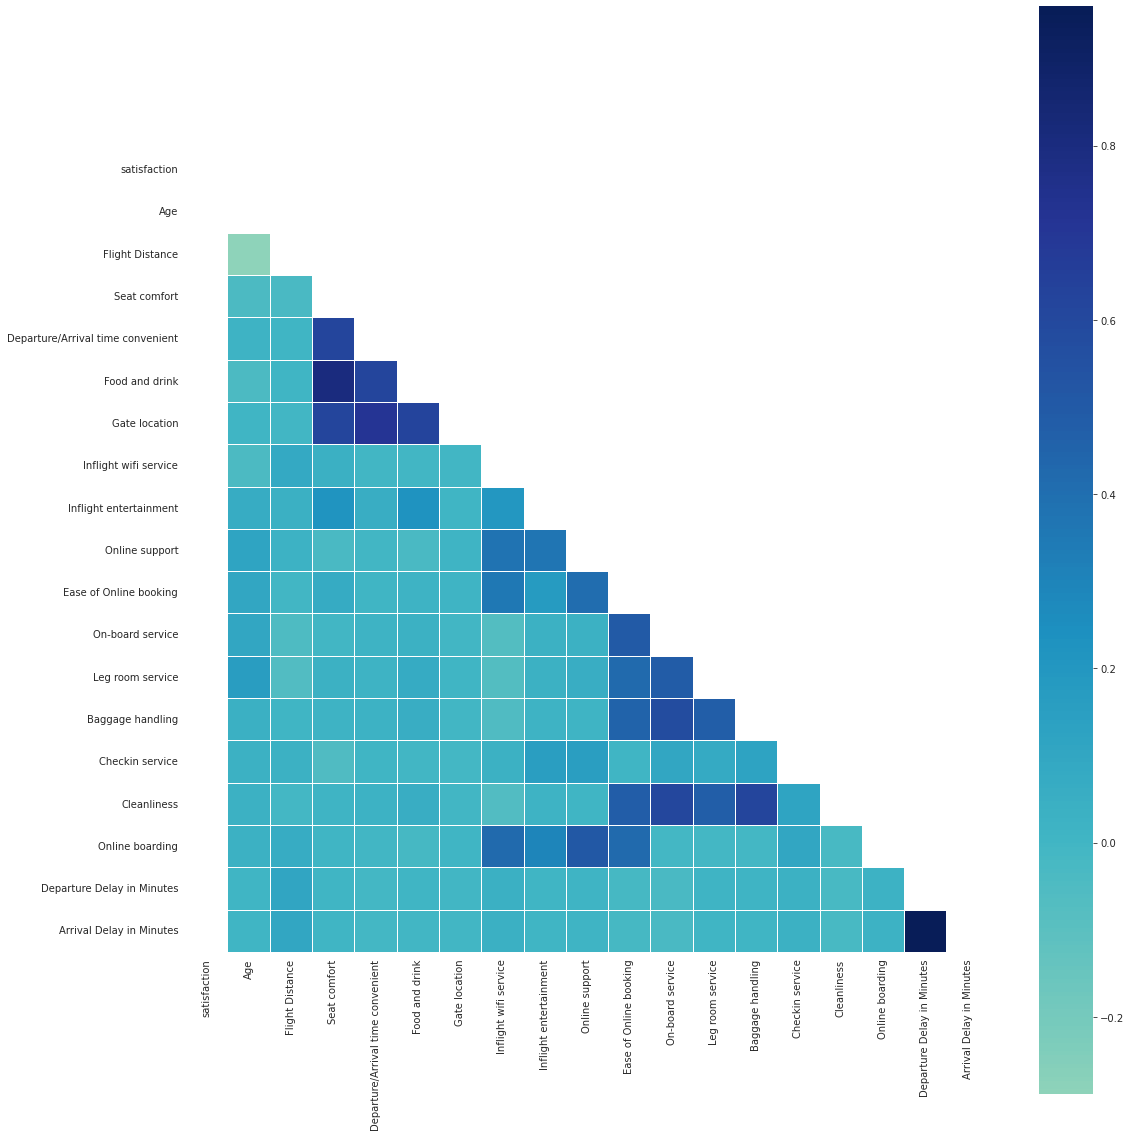

In [13]:
import matplotlib.pyplot as plt

data_satisfaction = data[data['satisfaction']==1]
corr = data_satisfaction.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

In [14]:
numerical = numerical.drop(['Departure Delay in Minutes', 'Food and drink', 'Gate location'], axis=1)

In [15]:
y = numerical['satisfaction']
X = numerical.drop('satisfaction', axis=1)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

standardize_var = ['Age']
standardize_transformer = Pipeline(steps=[('standard', StandardScaler())])
normalize_var = ['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Arrival Delay in Minutes']
normalize_transformer = Pipeline(steps=[('norm', MinMaxScaler())])

In [17]:
X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
0,65,265,0,0,2,4,2,3,3,0,3,5,3,2,0.0
1,47,2464,0,0,0,2,2,3,4,4,4,2,3,2,305.0
2,15,2138,0,0,2,0,2,2,3,3,4,4,4,2,0.0
3,60,623,0,0,3,4,3,1,1,0,1,4,1,3,0.0
4,70,354,0,0,4,3,4,2,2,0,2,4,2,5,0.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

preprocessor = ColumnTransformer(transformers=
    [('standard', standardize_transformer, standardize_var),
    ('norm', normalize_transformer, normalize_var)], remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs'))])
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat_probab = clf.predict_proba(X_test)

print('Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: 0.81


Jaccard Score is:  0.6818521284540702
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     11754
           1       0.82      0.84      0.83     14144

    accuracy                           0.81     25898
   macro avg       0.81      0.81      0.81     25898
weighted avg       0.81      0.81      0.81     25898



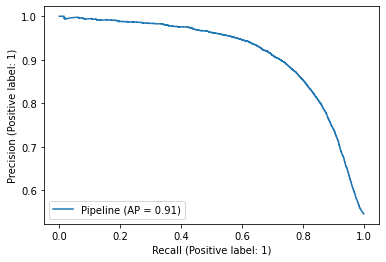

In [19]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report

import itertools

precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat, average='micro')

# print('Precision Score is: ', precision)
# print('Recall Score is: ',recall)
print('Jaccard Score is: ',jaccard)

print (classification_report(y_test, yhat))

plot_metrics = plot_precision_recall_curve(clf, X_test, y_test)

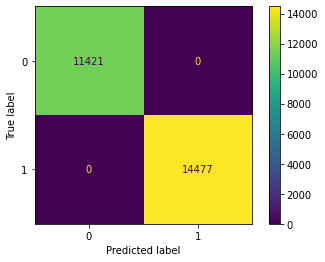

In [20]:
from sklearn.metrics import plot_confusion_matrix

plot_matrix = plot_confusion_matrix(clf, X_test, yhat)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()
lr = LogisticRegression()
knc = KNeighborsClassifier()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

model_pipeline = [dt, lr, knc]

model_names = ['Decision Tree Classifier', 'Logistic Regression', 'KNN']
scores = {}

for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Classifier': 0.9086716681376874, 'Logistic Regression': 0.75056266548985, 'KNN': 0.705648720211827}


In [22]:
# With a decision tree
from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predTree = dtree.predict(X_test)

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9737817592092053


In [24]:
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11754
           1       0.97      0.98      0.98     14144

    accuracy                           0.97     25898
   macro avg       0.97      0.97      0.97     25898
weighted avg       0.97      0.97      0.97     25898



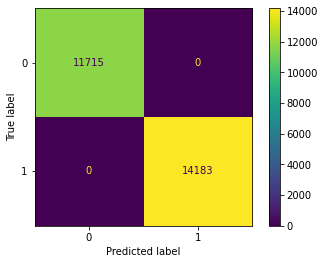

In [25]:
plot_matrix = plot_confusion_matrix(dtree, X_test, predTree)